## Bangalore Schools ##

This project aims to look at the area of playgrounds in ICSE and CBSE schools in Bangalore to see how much outdoor  playtime and space children get.


**Hypothesis:** Barely any.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 400)
icse = pd.read_csv('tabula-ICSE_schools.csv')
icse.head()

,Sl No,InstituteName,InstituteAddress,InstituteCode/\rAffiliation No,School Type,PhoneNumber
0,1,AC School,Mes Ring Road Jalahalli BENGALURU-560 013,KA223,ICSE,080-23452133 080-28383180
1,2,Aavishkar Academy,"#24/1, Sathyanarayana Temple Street Opposite\rPhilips Millenia Ulsoor BENGALURU-560 008",KA263,ISC,080-25561666
2,3,Acharya Pathasala Public School,N.R. Colony Narasimha Raja Colony BENGALURU-\r560 019,KA056,ISC,080-26621302 080-26603826
3,4,Acts Secondary School,"15 Km, Hosur Road Electronic City Post\rBENGALURU BENGALURU-560 100",KA073,ICSE,080-65370156
4,5,Aditya National Public School,"No.12, Kogilu Main Road, Maruthinagar 2nd\rDivision, Behind Annapurneshwari Temple\rBENGALURU BENGALURU-560064",KA360,ICSE,08065471969 8028571293


In [3]:
cbse = pd.read_csv('tabula-CBSE_schools.csv')
cbse.head(30)

,Sl\rNo,InstituteName,InstituteAddress,InstituteCode/A\rffiliation No,School Type,PhoneNumber
0,1,515 army base wkshop high school,"515 army base wkshop high school,\rcambridge road cross, halasuru\r,560008",880016,Secondary School,8025307559
1,2,A M C SCHOOL,"18TH KM NATIONAL PARK\rROAD BANGALORE\rKARNATAKA ,560083",830145,Secondary School,080 27828657
2,3,ACHIEVERS ACADEMY,"NO:49,SRIRAMPURA\rVILLAGE,BOMMASANDRA-\rJIGANI LINK ROAD,ANEKAL\rTALUK,BANGALORE 562105.\r,562105",830619,Secondary School,8027839266
3,4,AECS MAGNOLIA MAARUTI\rPUBLIC SCHOOL,"909/36, AREKERE,\rBANNERGHATTA ROAD,\r,560076",830230,Senior Secondary,080 26485622
4,5,Agragami Vidya Kendra,"C/A site No.15/1A A sector 13th\rMain Road, 80 Feet road,\rYelahanka New Town, Distt\rBangalore, Karnataka ,560064",830199,Secondary School,080 41686714
5,6,AIR FORCE SCHOOL(A.F.S\rYELAHANKA ),"A.F.S YELAHANKA\rBANGALORE KARNATAKA\r,560063",880010,Secondary School,080 28478067
6,7,AIR FORCE SCHOOL(J C NAGAR\rHEBBAL),"POST J C NAGAR HEBBAL\rBANGALORE KARNATAKA\r,560006",880005,Secondary School,080 23411061\rextb 7955 7631\r7633
7,8,AIR FORCE SCHOOL(JALAHALLI\rEAST),"JALAHALLI EAST BANGALORE\rKARNATAKA ,560014",880006,Secondary School,080 8397641
8,9,AIR FORCE\rSCHOOL(MURUGESHPALAYAM ),"MURUGESHPALAYAM CAMP\rVIMANPURA POST\rBANGALORE KARNATAKA\r,560017",880009,Secondary School,080 5272332
9,10,akash international residential public\rschool,"baichapura devanahalli town\rprasannahalli road, bangale rural-\r562110, prasannahalli road, bangale\rrural district. ,562110",830419,Senior Secondary,91 9480355444


In [4]:
icse['InstituteAddress'] = icse['InstituteAddress'].str.strip()
icse['pincode']  = icse['InstituteAddress'].str.extract(r'\D(\d{3}\D*\d{3})').replace(" ","")
#icse['pincode'] .replace(" ", "")

icse.head()

,Sl No,InstituteName,InstituteAddress,InstituteCode/\rAffiliation No,School Type,PhoneNumber,pincode
0,1,AC School,Mes Ring Road Jalahalli BENGALURU-560 013,KA223,ICSE,080-23452133 080-28383180,560 013
1,2,Aavishkar Academy,"#24/1, Sathyanarayana Temple Street Opposite\rPhilips Millenia Ulsoor BENGALURU-560 008",KA263,ISC,080-25561666,560 008
2,3,Acharya Pathasala Public School,N.R. Colony Narasimha Raja Colony BENGALURU-\r560 019,KA056,ISC,080-26621302 080-26603826,560 019
3,4,Acts Secondary School,"15 Km, Hosur Road Electronic City Post\rBENGALURU BENGALURU-560 100",KA073,ICSE,080-65370156,560 100
4,5,Aditya National Public School,"No.12, Kogilu Main Road, Maruthinagar 2nd\rDivision, Behind Annapurneshwari Temple\rBENGALURU BENGALURU-560064",KA360,ICSE,08065471969 8028571293,560064


In [5]:
icse['pincode']  = icse['pincode'].str.replace(" ","")
icse['pincode'] = icse['pincode'].str.replace("\r","")
icse.head()

,Sl No,InstituteName,InstituteAddress,InstituteCode/\rAffiliation No,School Type,PhoneNumber,pincode
0,1,AC School,Mes Ring Road Jalahalli BENGALURU-560 013,KA223,ICSE,080-23452133 080-28383180,560013
1,2,Aavishkar Academy,"#24/1, Sathyanarayana Temple Street Opposite\rPhilips Millenia Ulsoor BENGALURU-560 008",KA263,ISC,080-25561666,560008
2,3,Acharya Pathasala Public School,N.R. Colony Narasimha Raja Colony BENGALURU-\r560 019,KA056,ISC,080-26621302 080-26603826,560019
3,4,Acts Secondary School,"15 Km, Hosur Road Electronic City Post\rBENGALURU BENGALURU-560 100",KA073,ICSE,080-65370156,560100
4,5,Aditya National Public School,"No.12, Kogilu Main Road, Maruthinagar 2nd\rDivision, Behind Annapurneshwari Temple\rBENGALURU BENGALURU-560064",KA360,ICSE,08065471969 8028571293,560064


In [6]:
cbse['pincode'] = cbse['InstituteAddress'].str.strip().str.extract(r'\D(\d{3}\D*\d{3})')
cbse

,Sl\rNo,InstituteName,InstituteAddress,InstituteCode/A\rffiliation No,School Type,PhoneNumber,pincode
0,1,515 army base wkshop high school,"515 army base wkshop high school,\rcambridge road cross, halasuru\r,560008",880016,Secondary School,8025307559,560008
1,2,A M C SCHOOL,"18TH KM NATIONAL PARK\rROAD BANGALORE\rKARNATAKA ,560083",830145,Secondary School,080 27828657,560083
2,3,ACHIEVERS ACADEMY,"NO:49,SRIRAMPURA\rVILLAGE,BOMMASANDRA-\rJIGANI LINK ROAD,ANEKAL\rTALUK,BANGALORE 562105.\r,562105",830619,Secondary School,8027839266,562105
3,4,AECS MAGNOLIA MAARUTI\rPUBLIC SCHOOL,"909/36, AREKERE,\rBANNERGHATTA ROAD,\r,560076",830230,Senior Secondary,080 26485622,560076
4,5,Agragami Vidya Kendra,"C/A site No.15/1A A sector 13th\rMain Road, 80 Feet road,\rYelahanka New Town, Distt\rBangalore, Karnataka ,560064",830199,Secondary School,080 41686714,560064
...,...,...,...,...,...,...,...
324,345,Vishwaprajnaa Academy,"Yalachaguppe, Tavarekere Hobli,\rBangalore South Taluk,Bangalore.\r,562130",830785,Secondary School,8028536333,562130
325,346,Vyasa International School,"Sy. No. 101/2, Kodigehalli Village,\rYelahanka Hobli Bangalore North\rTaluk, Bangalore-94 ,560094",830316,Secondary School,080 23454777,560094
326,347,Vydehi School of Excellence,"82,EPIP Area, Vydehi Campus,\rWhitefield , Bangaluru- 560066\r,560066",830527,Secondary School,080 46636000,560066
327,348,Whitefield Global School,"KRS Garden, Channasandra Main\rRoad, near Hope Farm, White field\rBangalore- 560066 ,560066",830272,Secondary School,080 28450000,560066


In [7]:
icse['board'] = "ICSE"
icse

,Sl No,InstituteName,InstituteAddress,InstituteCode/\rAffiliation No,School Type,PhoneNumber,pincode,board
0,1,AC School,Mes Ring Road Jalahalli BENGALURU-560 013,KA223,ICSE,080-23452133 080-28383180,560013,ICSE
1,2,Aavishkar Academy,"#24/1, Sathyanarayana Temple Street Opposite\rPhilips Millenia Ulsoor BENGALURU-560 008",KA263,ISC,080-25561666,560008,ICSE
2,3,Acharya Pathasala Public School,N.R. Colony Narasimha Raja Colony BENGALURU-\r560 019,KA056,ISC,080-26621302 080-26603826,560019,ICSE
3,4,Acts Secondary School,"15 Km, Hosur Road Electronic City Post\rBENGALURU BENGALURU-560 100",KA073,ICSE,080-65370156,560100,ICSE
4,5,Aditya National Public School,"No.12, Kogilu Main Road, Maruthinagar 2nd\rDivision, Behind Annapurneshwari Temple\rBENGALURU BENGALURU-560064",KA360,ICSE,08065471969 8028571293,560064,ICSE
...,...,...,...,...,...,...,...,...
238,244,Vivekananda Educational Centre,"No. 1, 4Th Block East Jayanagar BENGALURU-560\r011",KA045,ICSE,080-26633167 080-41211099,560011,ICSE
239,245,Baldwin Boys' High School,", Richmond Town BENGALURU-560 025",KA002,ICSE,080-22211981 49363866 49363867,560025,ICSE
240,246,Florence Public School,"No. 6, P & T Colony R.T. Nagar BENGALURU-560\r032",KA031,ICSE,080-23531747 23333938 23439349,560032,ICSE
241,247,Primus Public School,Chikanayakanahalli Sarjapur Road BENGALURU\rBENGALURU-560 035,KA156,ICSE,080-24741450 080-24741452 25741451,560035,ICSE


In [8]:
cbse['board'] = "CBSE"
cbse

,Sl\rNo,InstituteName,InstituteAddress,InstituteCode/A\rffiliation No,School Type,PhoneNumber,pincode,board
0,1,515 army base wkshop high school,"515 army base wkshop high school,\rcambridge road cross, halasuru\r,560008",880016,Secondary School,8025307559,560008,CBSE
1,2,A M C SCHOOL,"18TH KM NATIONAL PARK\rROAD BANGALORE\rKARNATAKA ,560083",830145,Secondary School,080 27828657,560083,CBSE
2,3,ACHIEVERS ACADEMY,"NO:49,SRIRAMPURA\rVILLAGE,BOMMASANDRA-\rJIGANI LINK ROAD,ANEKAL\rTALUK,BANGALORE 562105.\r,562105",830619,Secondary School,8027839266,562105,CBSE
3,4,AECS MAGNOLIA MAARUTI\rPUBLIC SCHOOL,"909/36, AREKERE,\rBANNERGHATTA ROAD,\r,560076",830230,Senior Secondary,080 26485622,560076,CBSE
4,5,Agragami Vidya Kendra,"C/A site No.15/1A A sector 13th\rMain Road, 80 Feet road,\rYelahanka New Town, Distt\rBangalore, Karnataka ,560064",830199,Secondary School,080 41686714,560064,CBSE
...,...,...,...,...,...,...,...,...
324,345,Vishwaprajnaa Academy,"Yalachaguppe, Tavarekere Hobli,\rBangalore South Taluk,Bangalore.\r,562130",830785,Secondary School,8028536333,562130,CBSE
325,346,Vyasa International School,"Sy. No. 101/2, Kodigehalli Village,\rYelahanka Hobli Bangalore North\rTaluk, Bangalore-94 ,560094",830316,Secondary School,080 23454777,560094,CBSE
326,347,Vydehi School of Excellence,"82,EPIP Area, Vydehi Campus,\rWhitefield , Bangaluru- 560066\r,560066",830527,Secondary School,080 46636000,560066,CBSE
327,348,Whitefield Global School,"KRS Garden, Channasandra Main\rRoad, near Hope Farm, White field\rBangalore- 560066 ,560066",830272,Secondary School,080 28450000,560066,CBSE


Now that we have both icse and cbse school datasets, let's narrow down to zipcodes or 'pincodes'where most residences are.

In [9]:
schools = pd.read_csv('school_areas_seg.csv')
schools.head()

,name,school_area
0,"Kendriya Vidhyalaya, MEG Centre",170369
1,NaN,92118
2,Vagdevi Vilas School,58010
3,Kendriya Vidyalaya Hebbal,56078
4,BGS National Public School,53900


<AxesSubplot:>

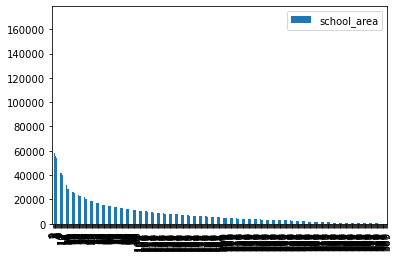

In [12]:
schools.plot(kind='bar')